<a href="https://colab.research.google.com/github/Ramjas-Langdi/Multithreading-assn/blob/main/MultiThreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+------------------+--------+---------+--------+--------+-------+--------+--------+--------+--------+--------+
| Threads          | T= 1   | T= 2    | T= 3   | T= 4   | T= 5  | T= 6   | T= 7   | T= 8   | T= 9   | T= 10  |
+------------------+--------+---------+--------+--------+-------+--------+--------+--------+--------+--------+
| Time taken (sec) | 7.9706 | 11.5437 | 8.5742 | 6.8037 | 8.561 | 6.7506 | 8.5003 | 6.9977 | 7.9623 | 8.3414 |
+------------------+--------+---------+--------+--------+-------+--------+--------+--------+--------+--------+


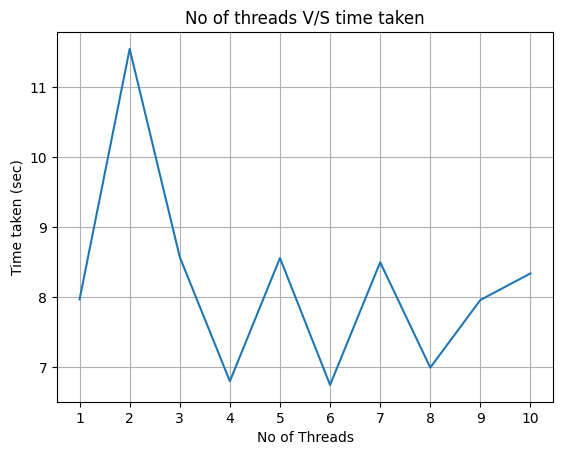

In [4]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

def multiply(A, B, result, index):
    result[index] = np.dot(A, B)

def run_threads(num_threads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=multiply, args=(A, matrix, results, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

A = np.random.rand(1000, 1000)

results = [None] * 100

matrices = [np.random.rand(1000, 1000) for _ in range(100)]

results_table = []
num_threads=list(range(1,11))
time_taken=[]
for num_t in num_threads:
    ttime= run_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T= "+str(num_t), round(ttime,4)))

ans = list(zip(*results_table))
print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

plt.plot(num_threads, time_taken)
plt.xlabel('No of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads V/S time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()